In [1]:
#packages import
import patsy
import pandas as pd
import scipy
import numpy as np
import matplotlib
import string

In [2]:
#creating a data frame and visualization of the data
data=pd.read_csv('raw_dataset_CERTandHeLa_SMCerGlcCer.csv')
data.head()

,CP0_ID.BR,CP0_ID.mode.BR,CP0_ID,GENE,BR,Good_bad,CP_plate,batch,Toxic,Series_p2,...,GlcDHCer38:1,GlcDHCer40:0,GlcDHCer40:0-OH,GlcDHCer40:1,GlcDHCer42:0,GlcDHCer42:0-OH,GlcDHCer42:1,GlcDHCer44:0,GlcDHCer44:0-OH,GlcDHCer44:1
0,CP0003_1,CP0003_p2_1_A.2,CP0003,HeLa MZ,BR1,Good,CP001,CP001_BR1,no,1,...,1.66,2.06,2.45,3.38,4.73,4.78,7.88,0.61,0.62,0.8
1,CP0003_1,CP0003_p2_1_A.1,CP0003,HeLa MZ,BR1,Good,CP001,CP001_BR1,no,1,...,0.72,1.63,2.43,2.45,3.88,4.54,6.42,1.47,1.39,1.32
2,CP0003_1,CP0003_p2_1_B.3,CP0003,HeLa MZ,BR1,Good,CP001,CP001_BR1,no,1,...,2.54,1.23,1.25,1.72,2.41,3.39,4.36,0.71,0.88,1.14
3,CP0003_1,CP0003_p2_1_A.3,CP0003,HeLa MZ,BR1,Good,CP001,CP001_BR1,no,1,...,1.93,3.33,2.42,2.19,4.12,3.53,7.12,1.43,1.29,1.41
4,CP0003_1,CP0003_p2_1_B.1,CP0003,HeLa MZ,BR1,Good,CP001,CP001_BR1,no,1,...,1.97,1.41,1.58,2.27,3.64,2.3,6.68,0.69,1.84,0.85


CP0_ID.BR          object
CP0_ID.mode.BR     object
CP0_ID             object
GENE               object
BR                 object
                    ...  
GlcDHCer42:0-OH    object
GlcDHCer42:1       object
GlcDHCer44:0       object
GlcDHCer44:0-OH    object
GlcDHCer44:1       object
Length: 205, dtype: object

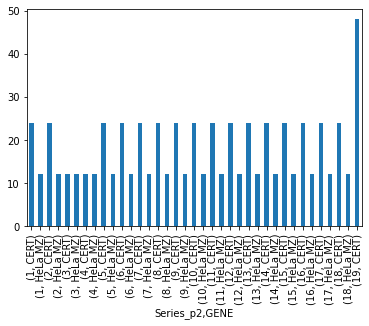

In [3]:
#Plot to see amount of measures in each series for each gene 
data.groupby(['Series_p2','GENE'])['GENE'].count().plot.bar()
data.dtypes

In [4]:
#Eliminate Cer 1P from the dataset
data = data[data.columns.drop(list(data.filter(regex='CerP')))]

In [5]:
#Filtering all the same lipids in one column / grouped by the name of lipids
filter_col_SM = [col for col in data if col.startswith('SM')]
filter_col_GlcCer = [col for col in data if col.startswith('Glc')]
filter_col_Cer = [col for col in data if col.startswith('DHCer')] + [col for col in data if col.startswith('Cer')]

lipids=filter_col_SM+filter_col_GlcCer+filter_col_Cer

In [6]:
#visualization of the clean data without the other columns
data[['GENE','Series_p2']+lipids].tail(30)

,GENE,Series_p2,SM28:0,SM28:1,SM28:2,SM30:0,SM30:0-OH,SM30:1-OH,SM30:2,SM30:2-OH,...,Cer42:1,Cer42:1-OH,Cer42:2,Cer42:2-OH,Cer42:3-OH,Cer44:1,Cer44:1-OH,Cer44:2,Cer44:2-OH,Cer40:2-OH+(H2O)
642,CERT,19,3.67,25.18,2.11,1482.75,2.52,25.32,16.25,?,...,2666.69,4049.02,4705.86,5018.4,148.42,71.82,18.99,93.63,10.8,40.93
643,CERT,19,4.65,25.96,2.08,1235.6,3.55,18.87,12.66,2.26,...,1848.96,3189.66,3306.25,3972.5,119.67,49.58,24.94,78.57,14.85,26.02
644,CERT,19,3.49,22.52,1.82,1405.75,2.59,25.03,11.09,1.14,...,2665.91,4176.91,4406.01,4803.95,150.9,63.93,32.99,91.65,?,44.91
645,CERT,19,4.69,23.56,2.17,1318.21,3.38,23.46,11.66,1.14,...,2671.03,4351.71,4878.65,4733.24,163.9,59.42,25.85,96.22,11.34,51.07
646,CERT,19,5.1,21.29,2.96,1438.73,2.04,24.64,11.71,1.29,...,2913.87,3834.69,5091.35,4720.31,172.71,92.54,18.54,109.61,18.34,41.57
647,CERT,19,5.87,19.9,1.64,1376.4,2.56,21.94,10.25,1.24,...,2882.55,4317.68,5434.79,5922.94,159.72,78.36,29.4,97.27,23.57,65.91
648,CERT,19,3.47,23.96,1.15,1456.1,2.91,21.82,9.74,0.81,...,2659.86,4055.03,3957.87,5007.95,118.19,56.99,12.83,91.44,13.78,42.59
649,CERT,19,8.31,43.54,2.68,1114.32,4.86,121.47,?,1.78,...,1711.6,4481.91,2751.53,4749.13,84.07,37.24,?,49.45,?,69.56
650,CERT,19,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?
651,CERT,19,3.94,23.78,1.44,1208.39,2.85,20.78,9.15,?,...,2057.59,3697.23,3957.1,4628.83,138.93,74.17,12,109.58,12.4,61.06


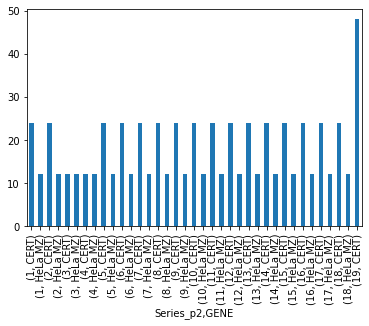

In [7]:
data.groupby(['Series_p2','GENE'])['GENE'].count().plot.bar()

In [8]:
#Transforming the lipids group from object to number to Sum up.
data[lipids] = data[lipids].apply(pd.to_numeric, errors='coerce')
data.dtypes

CP0_ID.BR           object
CP0_ID.mode.BR      object
CP0_ID              object
GENE                object
BR                  object
                    ...   
GlcDHCer42:0-OH    float64
GlcDHCer42:1       float64
GlcDHCer44:0       float64
GlcDHCer44:0-OH    float64
GlcDHCer44:1       float64
Length: 198, dtype: object

In [9]:
#Sum up all the all the
data['SM_Sum'] = data[filter_col_SM].sum(axis=1)
data['GlcCer_Sum'] = data[filter_col_GlcCer].sum(axis=1)
data['Cer_Sum'] = data[filter_col_Cer].sum(axis=1)

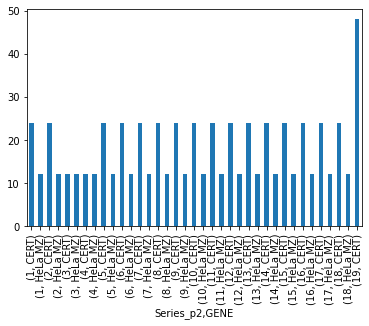

In [10]:
#Checking if we didnt loose any  any row in the apply function
data.groupby(['Series_p2','GENE'])['GENE'].count().plot.bar()

In [11]:
#Select the columns of interes and earease the rest
features = ['GENE', 'Series_p2', 'SM_Sum', 'GlcCer_Sum', 'Cer_Sum']
data = data[features]

In [12]:
pd.set_option('display.max_rows', 800)
data

,GENE,Series_p2,SM_Sum,GlcCer_Sum,Cer_Sum
0,HeLa MZ,1,43536.12,1065.75,14789.16
1,HeLa MZ,1,41313.79,1028.03,13530.46
2,HeLa MZ,1,39366.58,839.01,15437.23
3,HeLa MZ,1,40306.17,1045.12,15976.32
4,HeLa MZ,1,36961.95,806.58,18315.63
5,HeLa MZ,1,39606.50,871.02,17268.30
6,HeLa MZ,2,28525.97,538.23,15239.56
7,HeLa MZ,2,39965.83,980.92,21527.28
8,HeLa MZ,2,70185.41,1361.26,14067.39
9,HeLa MZ,2,33979.59,781.70,10718.96


In [13]:
#Elimination of the "0.0"
data= data[data['SM_Sum'] != 0]
data= data[data['GlcCer_Sum'] != 0]
data= data[data['Cer_Sum'] != 0]
data.reset_index()

,index,GENE,Series_p2,SM_Sum,GlcCer_Sum,Cer_Sum
0,0,HeLa MZ,1,43536.12,1065.75,14789.16
1,1,HeLa MZ,1,41313.79,1028.03,13530.46
2,2,HeLa MZ,1,39366.58,839.01,15437.23
3,3,HeLa MZ,1,40306.17,1045.12,15976.32
4,4,HeLa MZ,1,36961.95,806.58,18315.63
5,5,HeLa MZ,1,39606.50,871.02,17268.30
6,6,HeLa MZ,2,28525.97,538.23,15239.56
7,7,HeLa MZ,2,39965.83,980.92,21527.28
8,8,HeLa MZ,2,70185.41,1361.26,14067.39
9,9,HeLa MZ,2,33979.59,781.70,10718.96


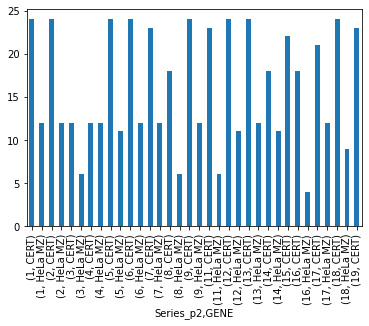

In [14]:
#Checking the rows lost in the str.constrains function
data.groupby(['Series_p2','GENE'])['GENE'].count().plot.bar()

In [15]:
#Calculation of the mean
mean_d=data.groupby(['GENE','Series_p2']).mean().round(2).reset_index()
mean_d

,GENE,Series_p2,SM_Sum,GlcCer_Sum,Cer_Sum
0,CERT,1,22713.44,1296.03,20056.12
1,CERT,2,17311.47,777.47,22166.83
2,CERT,3,21006.76,786.61,11749.99
3,CERT,4,128003.86,776.38,10398.17
4,CERT,5,20175.23,1285.44,14316.00
5,CERT,6,16394.00,1039.39,16301.47
6,CERT,7,10273.86,570.25,13320.96
7,CERT,8,29988.96,1733.73,12034.30
8,CERT,9,18271.15,1162.70,27501.45
9,CERT,11,14795.15,1212.17,11325.46


In [16]:
#Calculation of the std
std_d=data.groupby(['GENE','Series_p2']).std().round(2).reset_index()
std_d

,GENE,Series_p2,SM_Sum,GlcCer_Sum,Cer_Sum
0,CERT,1,7409.60,392.57,4463.08
1,CERT,2,3014.36,190.95,5972.11
2,CERT,3,7479.63,346.26,2845.69
3,CERT,4,14906.47,304.10,1075.68
4,CERT,5,4325.84,445.31,2850.75
5,CERT,6,4141.68,335.16,4131.81
6,CERT,7,2279.73,163.74,3116.98
7,CERT,8,41984.86,1972.41,6414.10
8,CERT,9,17533.65,401.19,7588.41
9,CERT,11,2805.55,317.17,3002.45


In [17]:
#Calculation of the CV%
var_d=data.groupby(['GENE','Series_p2']).var().round(2).reset_index()
var=std_d.iloc[:,2:7]/mean_d.iloc[:,2:7]
var[['GENE','Series']]=std_d.iloc[:,0:2]
var

,SM_Sum,GlcCer_Sum,Cer_Sum,GENE,Series
0,0.326221,0.302902,0.222530,CERT,1
1,0.174125,0.245604,0.269417,CERT,2
2,0.356058,0.440193,0.242187,CERT,3
3,0.116453,0.391690,0.103449,CERT,4
4,0.214413,0.346426,0.199130,CERT,5
5,0.252634,0.322458,0.253462,CERT,6
6,0.221896,0.287137,0.233991,CERT,7
7,1.400011,1.137668,0.532985,CERT,8
8,0.959636,0.345050,0.275928,CERT,9
9,0.189626,0.261655,0.265106,CERT,11


In [18]:
#Transformation of the data to log
data.iloc[:,[2,3,4]]=np.log(data.iloc[:,[2,3,4]])
data

,GENE,Series_p2,SM_Sum,GlcCer_Sum,Cer_Sum
0,HeLa MZ,1,10.681346,6.971434,9.601650
1,HeLa MZ,1,10.628952,6.935400,9.512699
2,HeLa MZ,1,10.580673,6.732223,9.644537
3,HeLa MZ,1,10.604260,6.951887,9.678863
4,HeLa MZ,1,10.517644,6.692803,9.815510
5,HeLa MZ,1,10.586749,6.769665,9.756628
6,HeLa MZ,2,10.258570,6.288286,9.631650
7,HeLa MZ,2,10.595780,6.888491,9.977076
8,HeLa MZ,2,11.158896,7.216166,9.551615
9,HeLa MZ,2,10.433515,6.661471,9.279769


CERT            AxesSubplot(0.1,0.15;0.363636x0.75)
HeLa MZ    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

<Figure size 800x600 with 0 Axes>

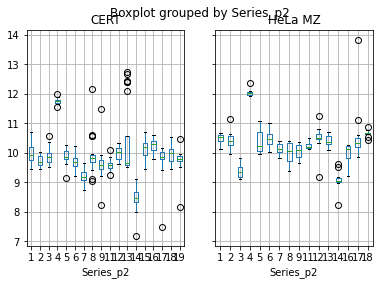

In [19]:
#Boxplot of the data Sphingomyelin
from matplotlib.pyplot import figure
figure( figsize=(8, 6), dpi=100)
data.groupby(['GENE']).boxplot(column='SM_Sum', by='Series_p2')

CERT            AxesSubplot(0.1,0.15;0.363636x0.75)
HeLa MZ    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

<Figure size 800x600 with 0 Axes>

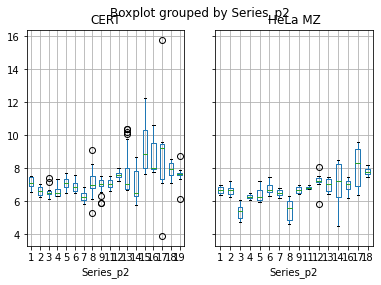

In [20]:
#Boxplot of the data GlcCer
from matplotlib.pyplot import figure
figure( figsize=(8, 6), dpi=100)
data.groupby(['GENE']).boxplot(column='GlcCer_Sum', by='Series_p2')

CERT            AxesSubplot(0.1,0.15;0.363636x0.75)
HeLa MZ    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

<Figure size 800x600 with 0 Axes>

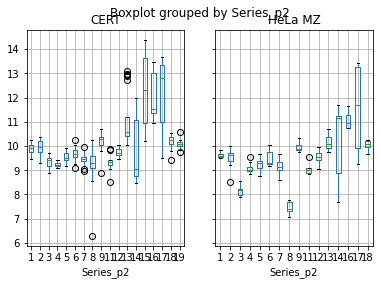

In [21]:
#Boxplot of the data Cer
from matplotlib.pyplot import figure
figure( figsize=(8, 6), dpi=100)
data.groupby(['GENE']).boxplot(column='Cer_Sum', by='Series_p2')

In [22]:
#We separate all the Hela and all the CERT conditions for the scatterplot
cert=data[data['GENE']=="CERT"]
hela=data[data['GENE']=="HeLa MZ"]

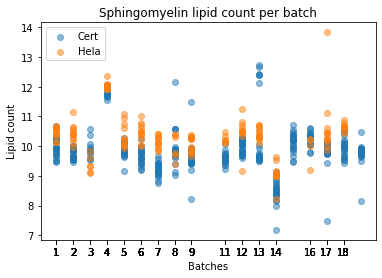

In [23]:
#Scatterplot Sphinglomyelin
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.scatter(cert['Series_p2'], cert['SM_Sum'],  alpha=0.5,label='Cert')
plt.scatter(hela['Series_p2'], hela['SM_Sum'], alpha=0.5,label='Hela')
plt.xticks(hela['Series_p2'])
plt.xlabel('Batches')
plt.ylabel('Lipid count')
plt.title('Sphingomyelin lipid count per batch')
plt.legend()
plt.show()

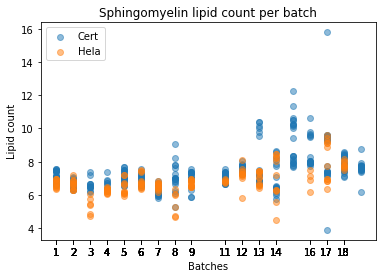

In [24]:
#Scatterplot GlcCeramide
plt.scatter(cert['Series_p2'], cert['GlcCer_Sum'],  alpha=0.5,label='Cert')
plt.scatter(hela['Series_p2'], hela['GlcCer_Sum'], alpha=0.5,label='Hela')
plt.xticks(hela['Series_p2'])
plt.xlabel('Batches')
plt.ylabel('Lipid count')
plt.title('Sphingomyelin lipid count per batch')
plt.legend()
plt.show()

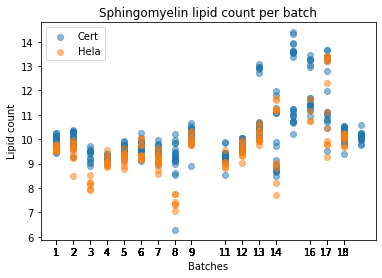

In [25]:
#Scatterplot Ceramide
plt.scatter(cert['Series_p2'], cert['Cer_Sum'],  alpha=0.5,label='Cert')
plt.scatter(hela['Series_p2'], hela['Cer_Sum'], alpha=0.5,label='Hela')
plt.xticks(hela['Series_p2'])
plt.xlabel('Batches')
plt.ylabel('Lipid count')
plt.title('Sphingomyelin lipid count per batch')
plt.legend()
plt.show()

In [26]:
data.groupby(['GENE']).corr()

Series_p2    SM_Sum  GlcCer_Sum   Cer_Sum
GENE                                                         
CERT    Series_p2    1.000000 -0.061460    0.489587  0.454421
        SM_Sum      -0.061460  1.000000    0.374744  0.237797
        GlcCer_Sum   0.489587  0.374744    1.000000  0.752805
        Cer_Sum      0.454421  0.237797    0.752805  1.000000
HeLa MZ Series_p2    1.000000 -0.169651    0.538863  0.496785
        SM_Sum      -0.169651  1.000000    0.156415 -0.022937
        GlcCer_Sum   0.538863  0.156415    1.000000  0.805086
        Cer_Sum      0.496785 -0.022937    0.805086  1.000000